# Name : Nisrin Dhoondia  



In [ ]:
!pip install opencv-python

In [ ]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=e325b7cd5b7cf05a0746d5768aac1f2720d807c06939f19f70fc9f8574b00484
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


In [ ]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 30 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,375 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pancard_jaldeep.jpg to pancard_jaldeep.jpg
Saving pancard_ChunaraManishKanubhai.jpg to pancard_ChunaraManishKanubhai.jpg
Saving pancard_RahulMishra.jpg to pancard_RahulMishra.jpg


In [ ]:
import cv2
import pytesseract
from pytesseract import Output
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
lst = ['pancard_jaldeep.jpg', 'pancard_ChunaraManishKanubhai.jpg', 'pancard_RahulMishra.jpg']


 (553, 890, 3)


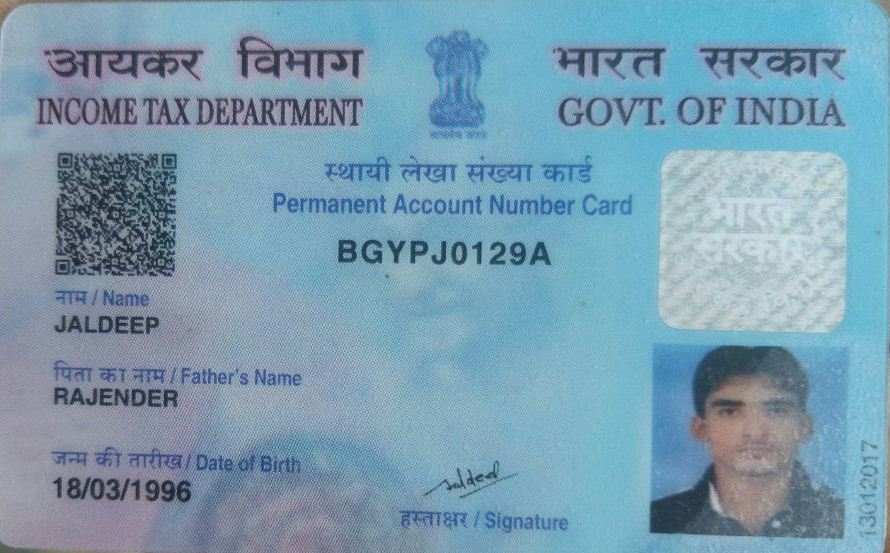


 (483, 770, 3)


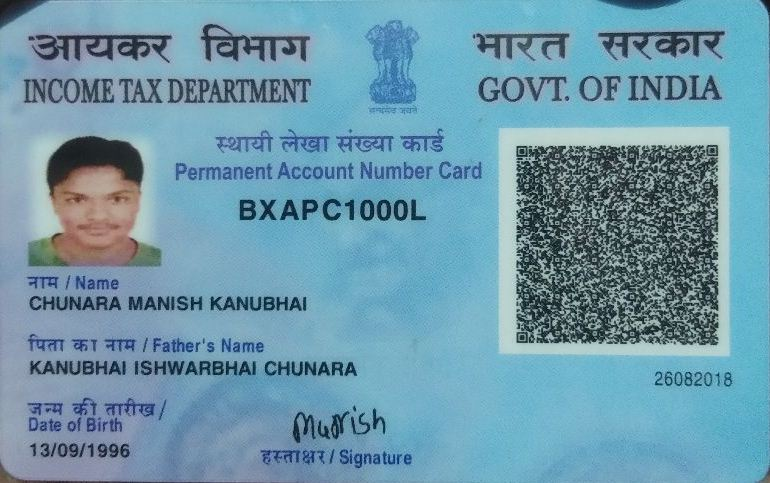


 (536, 859, 3)


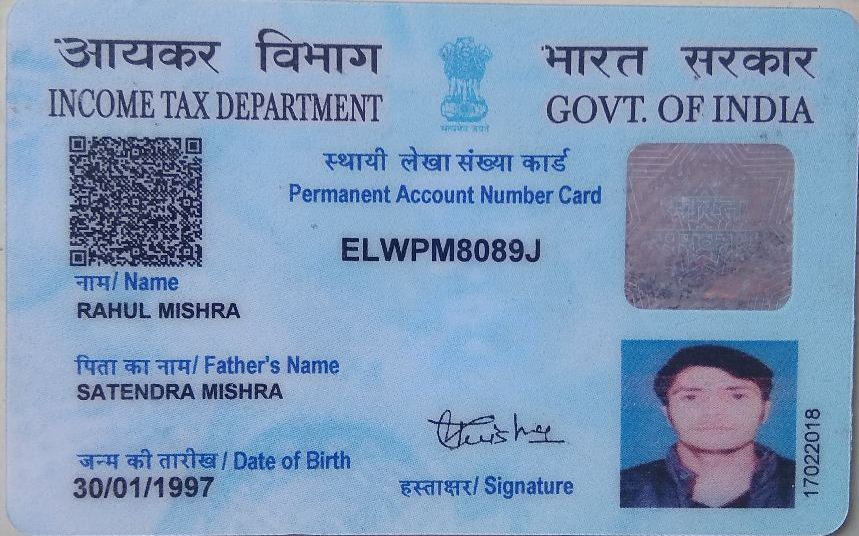

In [ ]:
from google.colab.patches import cv2_imshow

for x in range(len(lst)):
  cvimg = cv2.imread(lst[x])
  print('\n', cvimg.shape)
  cv2_imshow(cvimg)

In [ ]:
data_lst = []
for x in range(len(lst)):
  cvimg = cv2.imread(lst[x])
  gray_cvimg = cv2.cvtColor(cvimg, cv2.COLOR_BGR2GRAY)
  ret,thresh = cv2.threshold(gray_cvimg, 127, 255, cv2.THRESH_TRUNC)
  cvimg_text = pytesseract.image_to_string(thresh, output_type=Output.DICT)
  cvimg_dict = pytesseract.image_to_data(thresh, output_type=Output.DICT)
  # cvimg_dataframe = pytesseract.image_to_data(thresh, output_type='data.frame')
  print(cvimg_text, '\n')
  # print(cvimg_dict.keys(), '\n')
  print(cvimg_dict['text'], '\n')
  data_lst.append(list(cvimg_dict['text']))
  # print(cvimg_dataframe, '\n')
  print(data_lst)



{'text': "INCOMETAX DEPARTMENT = <= GOVT. OF INDIA\n\n      \n\nCATH ATA AEN TS\nPermanent Account Number Cz\nBGYPJ0129A\naTa / Name\nJALDEEP\nfaa i at / Father's Name 2\nRAJENDER |\n>\nwa & artna/ pa iat _abaed\n\n  \n\nSTATE / Signat\n\n18/03/1996\n\n \n\x0c"} 

['', '', '', '', 'INCOMETAX', 'DEPARTMENT', '=', '<=', 'GOVT.', 'OF', 'INDIA', '', '', '', ' ', '  ', ' ', '', '', '', 'CATH', 'ATA', 'AEN', 'TS', '', 'Permanent', 'Account', 'Number', 'Cz', '', 'BGYPJ0129A', '', 'aTa', '/', 'Name', '', 'JALDEEP', '', 'faa', 'i', 'at', '/', "Father's", 'Name', '2', '', 'RAJENDER', '|', '', '>', '', 'wa', '&', 'artna/', 'pa', 'iat', '_abaed', '', '', '', '  ', '', '', '', 'STATE', '/', 'Signat', '', '', '', '18/03/1996', '', '', '', ''] 

[['', '', '', '', 'INCOMETAX', 'DEPARTMENT', '=', '<=', 'GOVT.', 'OF', 'INDIA', '', '', '', ' ', '  ', ' ', '', '', '', 'CATH', 'ATA', 'AEN', 'TS', '', 'Permanent', 'Account', 'Number', 'Cz', '', 'BGYPJ0129A', '', 'aTa', '/', 'Name', '', 'JALDEEP', '', 'faa',

In [ ]:
unnecessary_data = ['', '=', '<=', 'CATH', 'ATA', 'AEN', 'TS', 'Cz', 'aTa', '/', 'faa', 'i', 'at', '|', '', '>', '', 'wa', '&', 'artna/', 'pa', 'iat', '_abaed',
                    '2', '_-', '—_—', 'ft', 'RT', 'AAT', 'GATS', 'anent', 'Bue',  'ava', 'faat', 'wT', 'ATH', 'aaa', 'a', 'ata', 'dae', 'ofan', 'Maal', '\\Sh'
                    'BEM', 'AT', '/', 'Gis', 'ka.',  'are', 'Bt', 'TRA!', 'wearer!', 'Signature', 'Streteex', 'fant', 'Ra', 'Wer', 'oe', 'ward', 'dant', 'den',
                    'ara/', 'frat', 'ara!', '‘Streteex']

In [ ]:
for data in data_lst:
  for words in data:
    if words not in unnecessary_data:
      print(words)
  print()

INCOMETAX
DEPARTMENT
GOVT.
OF
INDIA
 
  
 
Permanent
Account
Number
BGYPJ0129A
Name
JALDEEP
Father's
Name
RAJENDER
  
STATE
Signat
18/03/1996

INCOME
TAX
DEPARTMENT
GOVT.
OF
INDIA
Account
Number
Card
BXAPC1000L
 
 
Name
CHUNARA
MANISH
KANUBHAI
 
Father's
Name
KANUBHAI
ISHWARBHAI
CHUNARA
\Sh
13/09/1996
BEM
26082018
 
.

INCOME
TAX
DEPARTMENT
GOVT.
OF
INDIA
ward)
Permanent
Account
Number
Card
ELWPM8089J
   
 
Name
RAHUL
MISHRA
Father's
Name
SATENDRA
MISHRA
Date
of
Birth
30/01/1997



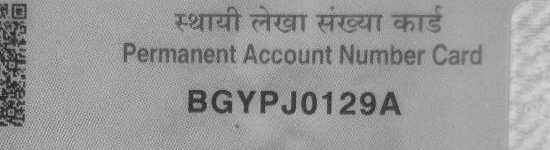


['', '', '', '', ' ', '', ' ', '', '', '', 'ETH', 'CAVA', 'WEI', 'GATE', '', 'Permanent', 'Account', 'Numbe', '', '', '', 'BGYPJ0129A', '', '', '', ''] 

    Permanent Account Numbe BGYPJ0129A 





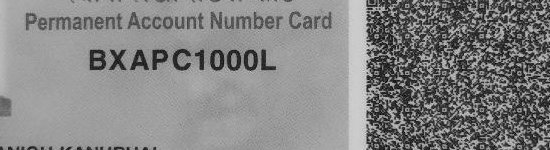


['', '', '', '', 'Permanent', 'Account', 'Number', 'Card', '', '', '', 'BXAPC1000L', '', '', '', ''] 

Permanent Account Number Card BXAPC1000L 





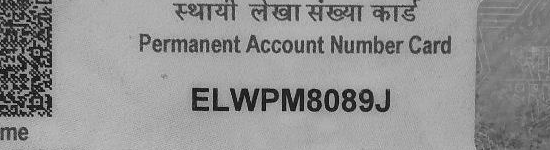


['', '', '', '', 'Taal', 'CST', 'AA', 'STS', '', 'Permanent', 'Account', 'Number', 'Card', '', '', '', 'ELWPM8089J', '', '', '', ' ', ''] 

Permanent Account Number Card ELWPM8089J   





In [ ]:
unwanted_words = ['', 'ETH', 'CAVA', 'WEI', 'GATE', 'Taal', 'CST', 'AA', 'STS']
for x in range(len(lst)):
  cvimg = cv2.imread(lst[x])
  gray_cvimg = cv2.cvtColor(cvimg, cv2.COLOR_BGR2GRAY)
  img_cropped = gray_cvimg[150:300, 150:700]
  cv2_imshow(img_cropped)
  print()
  ret,thresh = cv2.threshold(img_cropped, 127, 255, cv2.THRESH_TRUNC)
  cvimg_dict = pytesseract.image_to_data(thresh, output_type=Output.DICT)
  print(cvimg_dict['text'], '\n')
  for words in list(cvimg_dict['text']):
    if words not in unwanted_words:
      print(words, end = ' ')
  print('\n')
  print('\n')

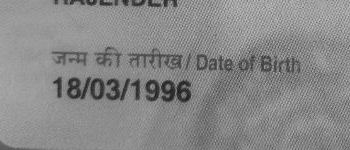


['', '', '', '', 'ee', 'a', '', '', '', 'wy', 'Hy', 'arin)', 'Date:', '', '18/03/1996', '', '', '', ''] 

Date: 18/03/1996 





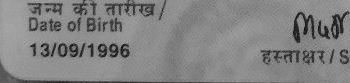


['', '', '', '', 'Wea', 'a1', 'ar', '', '', '', 'Date', 'of', 'Bin', 'Matt', '', '', '', '13/09/1996', 'BETAS'] 

Date 13/09/1996 





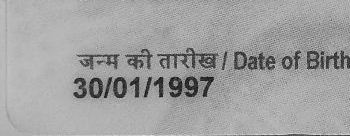


['', '', '', '', 'a-H', 'ST', 'TRI!', 'Date', 'of', 'Birth', '', '30/01/1997'] 

Date Birth 30/01/1997 





In [ ]:
unwanted_words = ['', 'ee', 'a', 'wy', 'Hy', 'arin)', 'Wea', 'a1', 'ar', 'of', 'Bin', 'Matt', 'BETAS', 'a-H', 'ST', 'TRI!',  ]
for x in range(len(lst)):
  cvimg = cv2.imread(lst[x])
  gray_cvimg = cv2.cvtColor(cvimg, cv2.COLOR_BGR2GRAY)
  img_cropped = gray_cvimg[400:550, 0:350]
  cv2_imshow(img_cropped)
  print()
  ret,thresh = cv2.threshold(img_cropped, 127, 255, cv2.THRESH_TRUNC)
  cvimg_dict = pytesseract.image_to_data(thresh, output_type=Output.DICT)
  print(cvimg_dict['text'], '\n')
  for words in list(cvimg_dict['text']):
    if words not in unwanted_words:
      print(words, end = ' ')
  print('\n')
  print('\n')